In [ ]:
""" To Do List
1)Find suitable groups based on spining data
2)Fins theh x,y,z distribution for all of the neurites
Find the length distribution for all of the neurites
Find the volume distribution for all of the neurites
Find the x, y, z distribution for all of the spining groups
For For all spining groups:
Take out the dendrite numbers and filter by size
Do heat map of compartments


"""

In [1]:
import datajoint as dj
import numpy as np
import time

from meshparty import trimesh_io
import pandas as pd
import seaborn as sns
sns.set() #sets the asethetics parameters in what set

In [2]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_ta3p100')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')


Connecting celiib@10.28.0.34:3306


In [3]:
#ta3p100.NeuriteTargetsRevised.describe()

In [4]:
#NeuriteTargets was recomputed from the NeuriteRevised list
len(ta3p100.NeuriteTargetsRevised() & "spine_num<total"),len(ta3p100.NeuriteTargetsRevised() )

(32068, 32124)

In [5]:
ta3p100.NeuriteTargetsRevised()

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_num total number of apicals synapsis for neurite,apical_prop perc of total number of apicals synapsis for neurite,apical_spine_prop perc of apical synapses that are apical spine synapses,apical_spine_head_prop perc of apical synapses that are apical spine head synapses,apical_spine_neck_prop perc of apical synapses that are apical spine neck synapses,apical_shaft_prop perc of apical synapses that are apical shaft synapses,basal_num total number of basal synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,basal_spine_prop perc of basal synapses that are basal spine synapses,basal_spine_head_prop perc of basal synapses that are basal spine head synapses,basal_spine_neck_prop perc of basal synapses that are basal spine neck synapses,basal_shaft_prop perc of basal synapses that are basal shaft synapses,oblique_num total number of oblique synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite,oblique_spine_prop perc of oblique synapses that are oblique spine synapses,oblique_spine_head_prop perc of oblique synapses that are oblique spine head synapses,oblique_spine_neck_prop perc of oblique synapses that are oblique spine neck synapses,oblique_shaft_prop perc of oblique synapses that are oblique shaft synapses,dendrite_num total number of dendrite synapsis for neurite,dendrite_prop perc of total number of dendrite synapsis for neurite,dendrite_spine_prop perc of dendrite synapses that are dendrite spine synapses,dendrite_spine_head_prop perc of dendrite synapses that are dendrite spine head synapses,dendrite_spine_neck_prop perc of dendrite synapses that are dendrite spine neck synapses,dendrite_shaft_prop perc of dendrite synapses that are dendrite shaft synapse,soma_num total number of soma synapsis for neurite,soma_prop perc of total number of soma synapsis for neurite,soma_non_spine_prop perc of total number of soma non_spine synapse,axon_num total number of axon synapsis for neurite,axon_prop perc of total number of axon synapsis for neurite,axon_non_spine_prop perc of total number of axon non_spine synapse,distal_num total number of distal synapsis for neurite,distal_prop perc of total number of distal synapsis for neurite,distal_non_spine_prop perc of total number of distal non_spine synapse,cilia_num total number of cilia synapsis for neurite,cilia_prop perc of total number of cilia synapsis for neurite,cilia_non_spine_prop perc of total number of cilia non_spine synapse,spine_num total number of spine synapsis for neurite,spine_prop perc of total number of spine synapsis for neurite,spine_head_num total number of spine head synapsis for neurite,spine_head_prop perc of total number of spine head synapsis for neurite,spine_neck_num total number of spine neck synapsis for neurite,spine_neck_prop perc of total number of spine neck synapsis for neurite,shaft_num total number of shaft synapsis for neurite,shaft_prop perc of total number of shaft synapsis for neurite,non_spine_num total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),non_spine_prop perc of total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),total total number of synapsis for neurite
2,648518346341351467,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.6,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.4,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,648518346341351503,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,648518346341351508,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.25,2.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,0.25,2.0,0.5,4.0
2,648518346341351509,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.428571,0.14285

In [22]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (ta3p100.NeuriteTargetsRevised() & "(spine_neck_num <total)").proj(
                                                         spine_head_prop="spine_head_prop/(1-spine_neck_prop)",
                                                         spine_prop="spine_prop/(1-spine_neck_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_neck_prop)",
                                                         #non_spine_prop="non_spine_prop/(1-spine_prop - spine_neck_prop)",
                                                         soma_prop = "soma_prop/(1-spine_neck_prop)",
                                                         axon_prop = "axon_prop/(1- spine_neck_prop)",
                                                         total="total - spine_neck_num",
                                            )

neurite_targets_no_spine



segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_prop calculated attribute,shaft_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute
2,648518346341351467,1.0,0.0,0.0,0.0,0.0,5.0
2,648518346341351503,1.0,0.0,0.0,0.0,0.0,5.0
2,648518346341351508,0.25,0.0,0.25,0.5,0.0,4.0
2,648518346341351509,0.8571428656578064,0.1428571492433548,0.0,0.0,0.0,7.0
2,648518346341351512,0.7777777910232544,0.1111111119389534,0.1111111119389534,0.0,0.0,9.0
2,648518346341351514,1.0,0.0,0.0,0.0,0.0,6.0
2,648518346341351518,1.0,0.0,0.0,0.0,0.0,4.0
2,648518346341351523,1.0,0.0,0.0,0.0,0.0,3.0
2,648518346341351525,0.7777777658200559,0.11111111295076065,0.11111111295076065,0.0,0.0,9.0
2,648518346341351531,1.0,0.0,0.0,0.0,0.0,3.0


In [23]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

32059
1048
1904
3606
7176


# Manually seperating the groups into: Axon, Soma, Head, Shaft

In [24]:
neurite_targets_no_spine_6 = (neurite_targets_no_spine & "total>6")
print("Total in neurite table with greater than 6 synapses = " + str(len(neurite_targets_no_spine_6)))

Total in neurite table with greater than 6 synapses = 7176


In [44]:
neurite_targets_no_spine_6 & "spine_prop>=0.6"

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_prop calculated attribute,shaft_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute


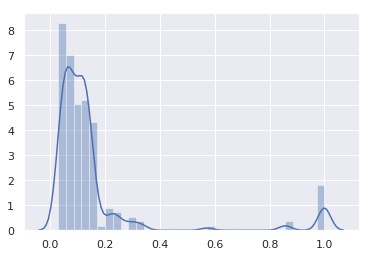

In [25]:
#show the distribution
axon_prop = neurite_targets_no_spine_6.fetch("axon_prop")
axon_prop
axon_greater_0_array = axon_prop[axon_prop.astype("float") > 0]
sns.distplot(axon_greater_0_array.astype("float"))

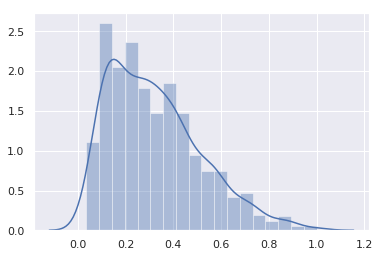

In [26]:
#show the distribution
soma_prop = neurite_targets_no_spine_6.fetch("soma_prop")
soma_prop
soma_greater_0_array = soma_prop[soma_prop.astype("float") > 0]
sns.distplot(soma_greater_0_array.astype("float"))

In [27]:
#manually find the groups
axon_group = neurite_targets_no_spine_6 & "axon_prop>0"
print("Axon group = " + str(len(axon_group)))
soma_group = neurite_targets_no_spine_6 & "soma_prop>=0.10"
print("Soma group = " + str(len(soma_group)))

Axon group = 194
Soma group = 879


In [28]:
#remove the axon and soma groups
neurite_targets_no_spine_6_without_axon_soma = neurite_targets_no_spine_6 - axon_group.proj() - soma_group.proj()
len(neurite_targets_no_spine_6_without_axon_soma)/len(neurite_targets_no_spine_6)

0.8656633221850614

In [29]:
#get heatmap of the data

neurite_spine_data = neurite_targets_no_spine_6_without_axon_soma.fetch(as_dict=True)

spine_df = pd.DataFrame(neurite_spine_data)
spine_df_base = spine_df.drop(columns=['segmentation', 'segment_id',"total","axon_prop","soma_prop"])
#spine_df_base

In [33]:
#sort by the first column and then do heat map
spine_df_base_head_shaft_sort = spine_df_base.sort_values(['spine_head_prop','shaft_prop'], ascending=[False,True])
spine_df_base_head_shaft_sort

,spine_head_prop,spine_prop,shaft_prop
203,1.0,0.0,0.0
744,1.0,0.0,0.0
4,1.0,0.0,0.0
2276,1.0,0.0,0.0
3653,1.0,0.0,0.0
65,1.0,0.0,0.0
106,1.0,0.0,0.0
173,1.0,0.0,0.0
491,1.0,0.0,0.0
824,1.0,0.0,0.0


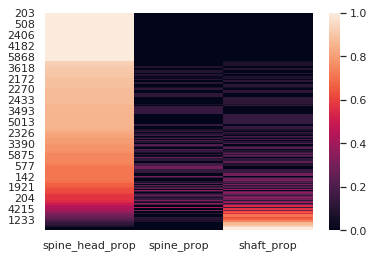

In [34]:
#heat map of spine heads
spine_head_shaft_sort = sns.heatmap(spine_df_base_head_shaft_sort)

In [36]:
#making the head group
head_group = neurite_targets_no_spine_6_without_axon_soma & "spine_head_prop >=0.6 OR spine_prop >=0.6"

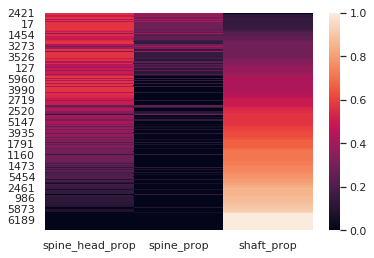

In [37]:
#heat map of spine heads
spine_shaft = spine_df_base_head_shaft_sort[spine_df_base_head_shaft_sort["spine_head_prop"]<0.6].sort_values("shaft_prop",ascending=True)
#spine_df_base_head_shaft_sort = spine_df_base.sort_values(['spine_head_prop','shaft_prop'], ascending=[False,True])
spine_head_shaft_sort = sns.heatmap(spine_shaft)

In [41]:
#making the shaft group
shaft_group = (neurite_targets_no_spine_6_without_axon_soma & "shaft_prop >=0.5") - head_group.proj() 
shaft_group

segmentation segmentation id,segment_id segment id unique within each Segmentation,spine_head_prop calculated attribute,spine_prop calculated attribute,shaft_prop calculated attribute,soma_prop calculated attribute,axon_prop calculated attribute,total calculated attribute
2,648518346341352417,0.36363638087737665,0.0,0.6363636380877377,0.0,0.0,11.0
2,648518346341353409,0.3333333432674408,0.0,0.6666666865348816,0.0,0.0,12.0
2,648518346341356580,0.1250000010477379,0.0,0.8750000157160684,0.0,0.0,8.0
2,648518346341356752,0.21052632074276822,0.0,0.7894736792572318,0.0,0.0,19.0
2,648518346341356798,0.0,0.0,1.0,0.0,0.0,7.0
2,648518346341356908,0.2777777782376902,0.0,0.7222221969270411,0.0,0.0,18.0
2,648518346341357171,0.20000000298023224,0.10000000149011612,0.699999988079071,0.0,0.0,10.0
2,648518346341357287,0.2500000046566129,0.0,0.7500000325962902,0.0,0.0,8.0
2,648518346341357529,0.21428571428571427,0.0,0.7857142857142857,0.0,0.0,14.0
2,648518346341357579,0.2857142984867096,0.0,0.7142857313156128,0.0,0.0,7.0


In [42]:
unused = neurite_targets_no_spine_6_without_axon_soma - head_group.proj() - shaft_group.proj()

In [43]:
len(soma_group),len(axon_group),len(head_group),len(shaft_group),len(unused)

(879, 194, 5194, 615, 403)

In [ ]:
ta3p100.LabelKey.describe()

In [ ]:
#SpineClustersKey.drop()

In [ ]:
#look up datajoint table that has the clusters
@schema
class SpineClustersKey(dj.Lookup):
    definition="""
    cluster_id : tinyint unsigned #numeric label of cluster
    ---
    description : varchar(16) #descriptive name of cluster
    threshold   : float #the proportion cut off for the group based on the category
    """
    

In [ ]:
cluster_descriptions = ["Soma","Axon","Spine Head","Shaft","Unused"]
cluster_thresholds = [0.10,0.01,0.6,0.5,0]

clusters_dict = [dict(cluster_id=i,description=cd,threshold=ct) for i,(cd,ct) in enumerate(zip(cluster_descriptions,cluster_thresholds))]
clusters_dict

In [ ]:
SpineClustersKey.insert(clusters_dict,skip_duplicates=True)

In [ ]:
SpineClustersKey()

In [ ]:
## Creates the table that holds all of the segment groups
@schema
class SpineClusters(dj.Manual):
    definition="""
    -->SpineClustersKey
    
    
    
    """

In [ ]:
#heat map of spine heads
spine_head_sort = sns.heatmap(spine_df_base_sh_sort)

In [ ]:
#sorting by ascending for spine head and descending for spine shaft
#df.sort_values(['a', 'b'], ascending=[True, False])
spine_df_base_hANDsh = spine_df_base.sort_values(['spine_head_prop','shaft_prop','spine_neck_prop'], ascending=[False,True,False])

#OBSERVATION: seems to be groups 
head_AND_shaft_desc_sort = sns.heatmap(spine_df_base_hANDsh)      

In [ ]:
"""
OBSERVATIONS: groups from first glance
1) Heavy spine head
2) Spine head and Spine neck
3) Spine head and Spine shaft
4) Non-spine
5) Spine shaft

How to sort these groups
1) Use datajoint to filter out the highest proportion spine_heads and download (put into pandas table)
2) Download rest of data and sort by shaft and neck in opposite directions
3) see what happens with non spine (could do in between steps 1 and 2)
"""

In [ ]:
neurite_targets_no_spine_10_head = (neurite_targets_no_spine_10 & "spine_head_prop>0.80").fetch(as_dict=True)
mostly_head = pd.DataFrame(neurite_targets_no_spine_10_head)
mostly_head_base = mostly_head.drop(columns=['segmentation', 'segment_id',"total"])
mostly_head_base_sorted = mostly_head_base.sort_values("spine_head_prop",ascending=False)
sns.heatmap(mostly_head_base_sorted)

In [ ]:
#get the left over data
neurite_targets_no_spine_10_non_head = (neurite_targets_no_spine_10 - neurite_targets_no_spine_10_head).fetch(as_dict=True)
print(len(neurite_targets_no_spine_10_non_head))
non_head = pd.DataFrame(neurite_targets_no_spine_10_non_head)
non_head_base = non_head.drop(columns=['segmentation', 'segment_id',"total"])
non_head_base_sorted = non_head_base.sort_values(["shaft_prop","spine_neck_prop"],ascending=[True,False])
sns.heatmap(non_head_base_sorted)

In [ ]:
non_head_base_sorted_neck = non_head_base.sort_values(["spine_neck_prop","shaft_prop"],ascending=[True,False])
sns.heatmap(non_head_base_sorted_neck)

In [ ]:
#get the left over data

neurite_targets_no_spine_10_shaft_pre = (neurite_targets_no_spine_10 & "spine_head_prop<0.80" & "shaft_prop>0.5")
#neurite_targets_no_spine_10_shaft_pre = (neurite_targets_no_spine_10 )#.fecth(as_dict=True)
neurite_targets_no_spine_10_shaft = neurite_targets_no_spine_10_shaft_pre.fetch(as_dict=True)

neurite_targets_no_spine_10_shaft
print(len(neurite_targets_no_spine_10_shaft))
shaft = pd.DataFrame(neurite_targets_no_spine_10_shaft)
shaft_base = shaft.drop(columns=['segmentation', 'segment_id',"total"])
shaft_base_sorted = shaft_base.sort_values("shaft_prop",ascending=True)
sns.heatmap(shaft_base_sorted)

In [ ]:
#Get the rest of the data and do heat map
neurite_heads = (neurite_targets_no_spine_10 & "spine_head_prop>0.80")
neurite_shafts = (neurite_targets_no_spine_10_shaft_pre)
rest_targets = (neurite_targets_no_spine_10 - neurite_targets_no_spine_10_shaft_pre.proj() 
                                - neurite_heads.proj())
print(len(neurite_heads),len(neurite_shafts),len(rest_targets),len(neurite_targets_no_spine_10))
print(len(neurite_heads)+len(neurite_shafts)+len(rest_targets)==len(neurite_targets_no_spine_10))

In [ ]:
#like this one better of the two
rest = rest_targets.fetch(as_dict=True)
rest_df = pd.DataFrame(rest)
rest_base = rest_df.drop(columns=['segmentation', 'segment_id',"total"])
rest_base_sorted = rest_base.sort_values(["non_spine_prop","spine_neck_prop"],ascending=[True,False])
rest_base_sorted_2 = rest_base.sort_values(["spine_neck_prop","non_spine_prop"],ascending=[False,True])
sns.heatmap(rest_base_sorted)


In [ ]:
sns.heatmap(rest_base_sorted_2)

In [ ]:
#combine the data tables all into one to represent total clustering
frames = [mostly_head_base_sorted,rest_base_sorted,shaft_base_sorted]
result = pd.concat(frames, keys=['head', 'neck&non_spine', 'shaft'])
sns.heatmap(result)

In [ ]:

funconnect = dj.create_virtual_module("fc","goldfunc_fc")
#n_syn_union: A only syn, B only syn, max of (syn onto A, syn onto B)
funconnect.SharedInput()

In [ ]:
dj.ERD(funconnect)